In [1]:
import pandas as pd
import os
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('AGGREGATED_DATA_mobile_developer_berlin.csv')

In [4]:
df.shape

(3737, 16)

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.columns

Index(['company_name', 'position', 'location', 'url', 'date_posted',
       'Number of applicants', 'full-time/part-time', 'seniority level',
       'employees', 'descriptions', 'industry', 'top competitive skills',
       'Hiring Trend Company Wide', 'Hiring Trend Company Wide-Engineering',
       'Median Tenure'],
      dtype='object')

In [7]:
pd.DataFrame(df['position'].value_counts()).reset_index()

,index,position
0,software development engineer,116
1,android developer,44
2,senior android developer,35
3,software engineer,31
4,senior android engineer,31
5,senior ios developer,27
6,senior ios engineer,26
7,ios engineer f m d,21
8,lead mobile developer ios android,21
9,software engineer backend,20


In [8]:
df['position'] = df['position'].apply(lambda x: x.lower())
df['descriptions'] = df['descriptions'].apply(lambda x: x.lower())

In [9]:
def filter_df(x, y):
    if ('mobile' in x) or ('android' in x) or ('ios' in x) or ('swift' in x) or ('kotlin' in x) :
        return "keep"
    else:
        if ('android' in y) or ('ios' in y) or ('mobile development' in y) or ('mobile developer' in y):
            return 'keep'
        elif ('swift' in y) or ('kotlin' in y):
            return 'keep'
        else:
            return 'remove'      

In [10]:
df['new_filter'] = list(map(filter_df, df['position'], df['descriptions']))

In [11]:
df = df[df['new_filter']=='keep'].reset_index(drop=True)
df = df.drop(['new_filter'], axis=1)

In [12]:
df.shape

(2132, 15)

# Top Companies Hiring

In [13]:
temp = pd.DataFrame(df['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
temp.head(30)

,company_name,number of postings
0,zalando,186
1,amazon,148
2,picsart,82
3,delivery hero,59
4,mobile.de gmbh,35
5,sumup,34
6,client server,33
7,agoda,33
8,zattoo,30
9,n26,30


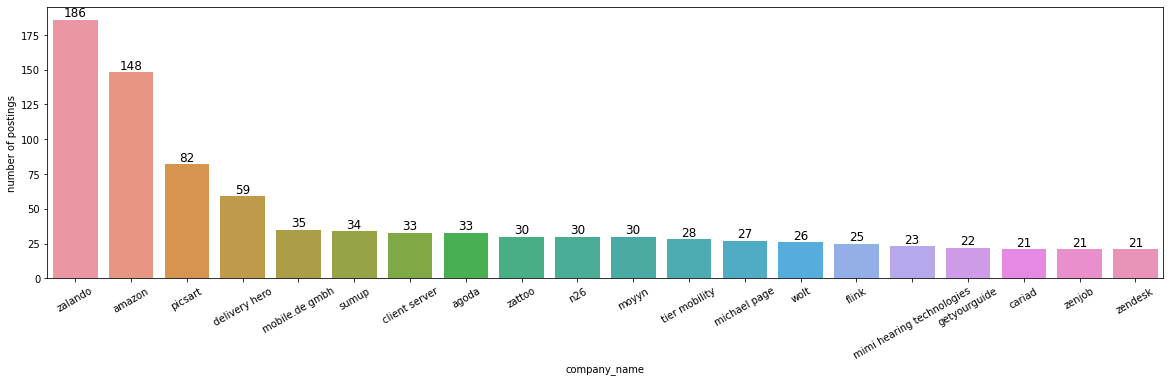

In [14]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions 

In [15]:
top_positions = pd.DataFrame(df['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
top_positions

,position,count
0,android developer,44
1,software development engineer,40
2,senior android developer,35
3,senior android engineer,31
4,senior ios developer,27
5,senior ios engineer,26
6,ios engineer f m d,21
7,lead mobile developer ios android,21
8,android engineer,20
9,senior ios developer m f d,18


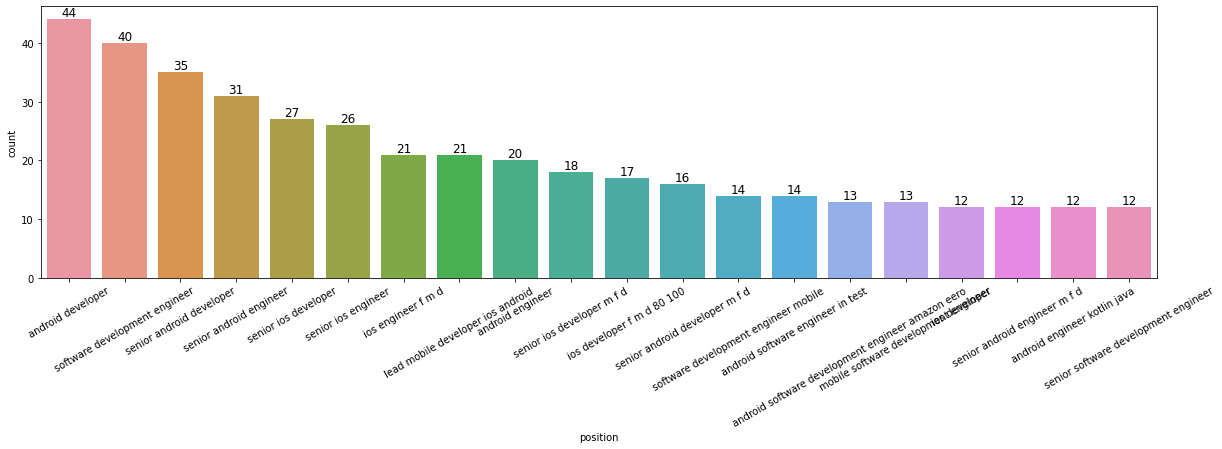

In [16]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [17]:
df.columns

Index(['company_name', 'position', 'location', 'url', 'date_posted',
       'Number of applicants', 'full-time/part-time', 'seniority level',
       'employees', 'descriptions', 'industry', 'top competitive skills',
       'Hiring Trend Company Wide', 'Hiring Trend Company Wide-Engineering',
       'Median Tenure'],
      dtype='object')

In [18]:
top_skills = []
for row_content in df['top competitive skills']:
    row_content = row_content.replace('/', ' ').replace('-', ' ')
    if len(row_content) > 3:
        try:
            for item in re.findall('\w+ \w+ \w+', row_content):  # Skills with 3 words
                top_skills.append(item)
            for item in re.findall('\w+ \w+', row_content):  # Skills with 2 words
                top_skills.append(item)
            for item in re.findall('\'\w+\'', row_content):  # Skill with single word
                top_skills.append(re.findall('\w+', item)[0])
        except TypeError:
            pass

top_skills = [item.lower() for item in top_skills]

In [19]:
def clean_skill(x):
    if ('cascading' in x) or ('css' in x):
        return 'css'
    elif 'ios' in x:
        return 'ios'
    elif 'android' in x:
        return 'android'
    elif 'sql' in x:
        return'sql'
    elif 'object oriented' in x:
        return 'object oriented programing'
    elif 'back end' in x:
        return 'back end'
    elif 'front end' in x:
        return 'front end'
    elif ('full stack' in x) or ('fullstack' in x):
        return 'full stack'
    elif 'user interface' in x:
        return 'user interface design'
    elif 'php' in x:
        return 'php'
    elif 'model view' in x:
        return 'model view'
    elif 'programming' in x:
        return 'programming language'
    elif 'azure' in x:
        return 'azure'
    elif 'web design' in x:
        return 'web design'
    elif ('software project' in x) or ('project management' in x):
        return 'project management'
    elif 'java database' in x:
        return 'java database'
    elif 'sap' in x:
        return 'sap'
    elif 'apis' in x:
        return 'apis'
    else:
        return x  

In [20]:
top_skills = pd.Series(top_skills).apply(clean_skill)

# Top Skills of the candidates who applied for the job

In [21]:
x = pd.DataFrame(pd.DataFrame(top_skills).value_counts())
x.columns = ['count']
x = x.reset_index()
x.columns = ['skill', 'count']
x = x[x['count']> 7]
x

,skill,count
0,sql,1313
1,android,1061
2,javascript,628
3,programming language,624
4,css,548
5,model view,518
6,object oriented programing,494
7,ios,488
8,java,445
9,git,337


In [22]:
'swift' in x['skill']

False

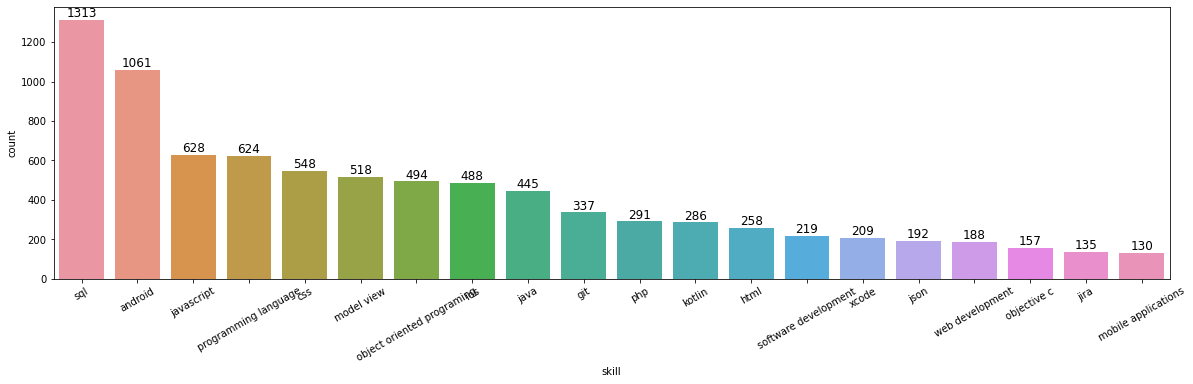

In [23]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=x.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [24]:
skills = x['skill']
skills = list(skills.values)

In [25]:
skills.append('swift')

In [26]:
other_skills = ['xamarin', 'appcelerator', 'cordova', 'phonegap', 'buildfire', 'ionic', 'android sdk', 
               'android studio', 'angular', 'objective-c', 'dart', 'lua', 'rust' ,'action script' ,
               'mobile design']

In [27]:
skills = skills + other_skills

# Top Skills Asked by the employers

In [28]:
import re

In [29]:
skills_count = {}
for skill in skills:
    counter = 0
    for description in df['descriptions']:
        if (skill == 'ci') and len(re.findall('ci ', description))>0:
            counter+=1
        elif skill in description:
            counter += 1
    skills_count[skill] = counter

In [30]:
skills_count = pd.DataFrame(dict(sorted(skills_count.items(), key=lambda x: x[1], reverse=True)).items())
skills_count.columns = ['skill', 'count']

In [31]:
skills_count

,skill,count
0,ios,1422
1,android,1383
2,unity,1219
3,git,1066
4,java,1065
5,testing,1065
6,english,1034
7,kotlin,958
8,communication,956
9,swift,717


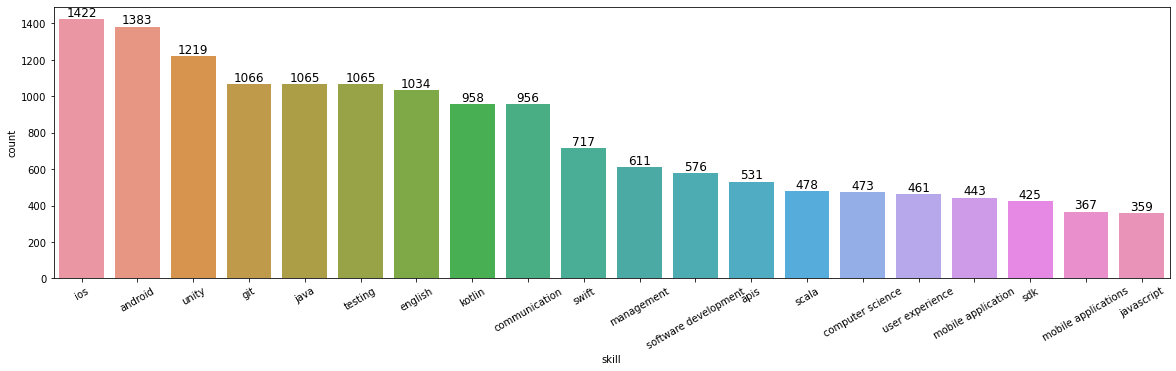

In [32]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [33]:
## Next analysis : Top skills for iOS jobs and for Android Jobs 

In [34]:
df['position'].value_counts()

android developer                                                                                      44
software development engineer                                                                          40
senior android developer                                                                               35
senior android engineer                                                                                31
senior ios developer                                                                                   27
senior ios engineer                                                                                    26
ios engineer f m d                                                                                     21
lead mobile developer ios android                                                                      21
android engineer                                                                                       20
senior ios developer m f d                    

In [35]:
def iOS_android_positions(x):
    if 'ios' in x:
        return 'ios'
    elif 'android' in x:
        return 'android'
    else:
        return 'other'    

In [36]:
df['platform'] = df['position'].apply(iOS_android_positions)

# iOS Analysis

In [37]:
ios_df = df[df['platform']=='ios']
ios_df.shape

(544, 16)

In [38]:
skills_count_ios = {}
counter = 0
for skill in skills:
    counter = 0
    for description in ios_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_ios[skill] = counter
skills_count_ios = pd.DataFrame(dict(sorted(skills_count_ios.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_ios.columns = ['skill', 'count']
skills_count_ios = skills_count_ios[skills_count_ios['count']>0]
skills_count_ios

,skill,count
0,ios,519
1,swift,483
2,unity,327
3,english,318
4,git,275
5,testing,268
6,android,231
7,communication,229
8,objective c,217
9,sdk,159


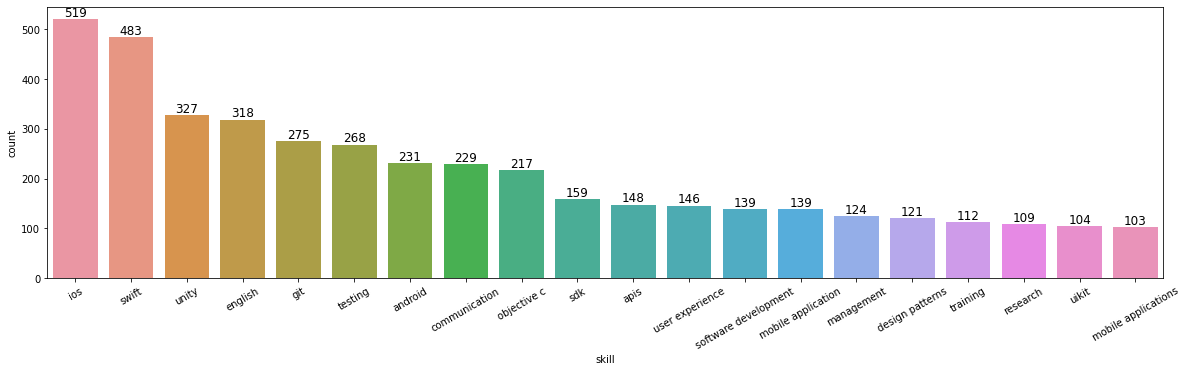

In [39]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

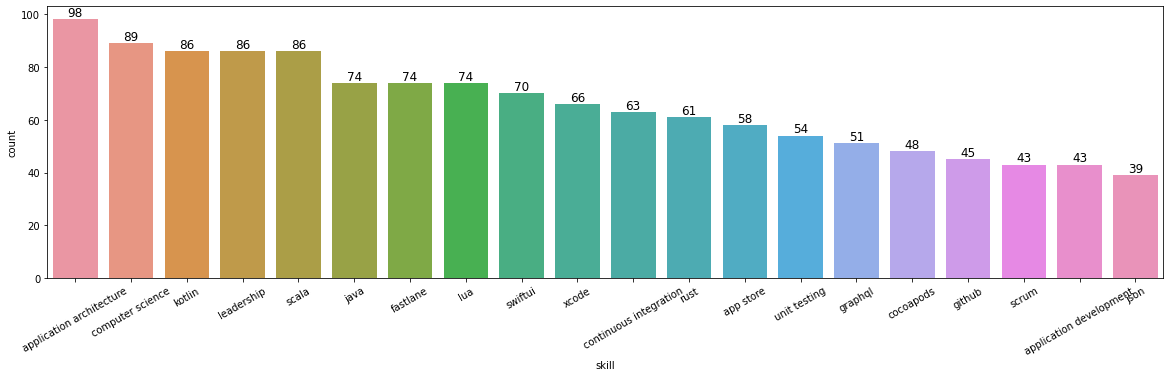

In [40]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.iloc[20:40])
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top companies iOS

In [41]:
top_companies_ios = pd.DataFrame(ios_df['company_name'].value_counts()).reset_index()
top_companies_ios.columns =['company_name', 'number of postings']
top_companies_ios

,company_name,number of postings
0,zalando,72
1,sumup,26
2,picsart,24
3,client server,21
4,delivery hero,20
5,mimi hearing technologies,19
6,join.com,14
7,mobile.de gmbh,12
8,sharecare,11
9,michael page,10


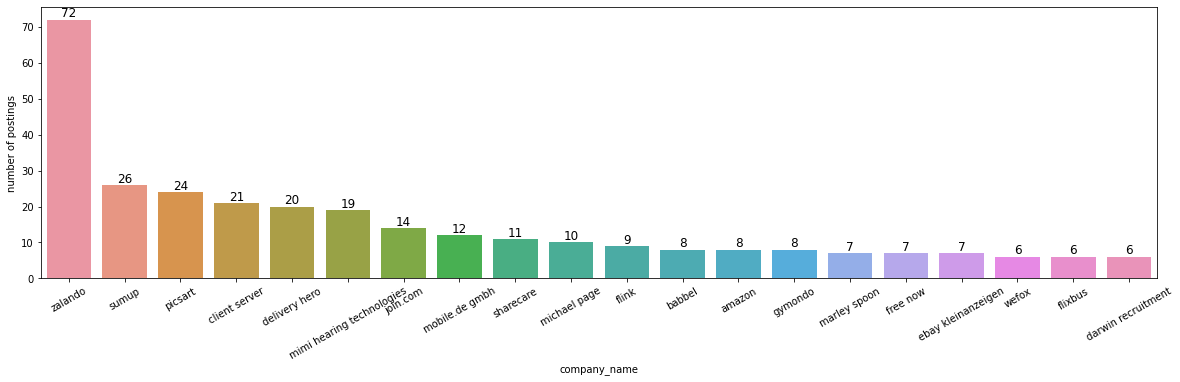

In [42]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Android Analysis

In [43]:
android_df = df[df['platform']=='android']
android_df.shape

(651, 16)

In [44]:
skills_count_android = {}
counter = 0
for skill in skills:
    counter = 0
    for description in android_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_android[skill] = counter
skills_count_android = pd.DataFrame(dict(sorted(skills_count_android.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_android.columns = ['skill', 'count']
skills_count_android = skills_count_android[skills_count_android['count']>0]
skills_count_android

,skill,count
0,android,624
1,kotlin,537
2,java,461
3,testing,382
4,unity,348
5,git,336
6,communication,313
7,english,292
8,ios,264
9,sdk,198


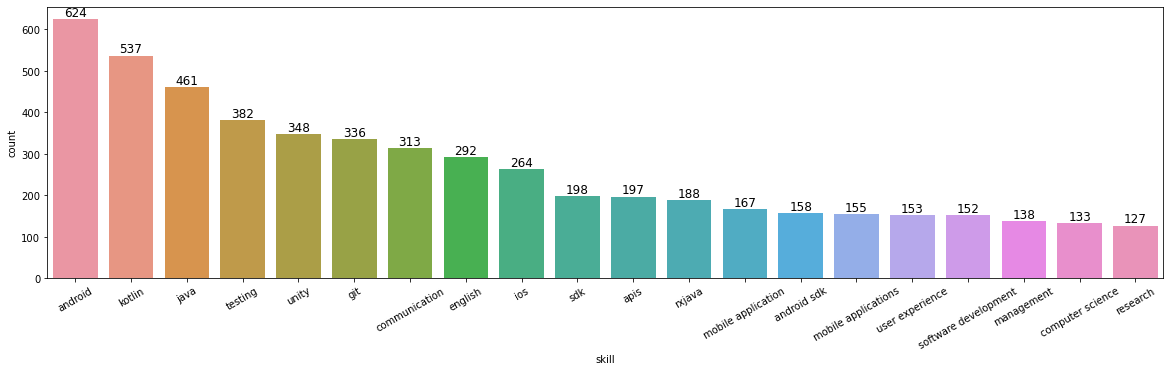

In [45]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_android.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top companies Android

In [46]:
top_companies_android = pd.DataFrame(android_df['company_name'].value_counts()).reset_index()
top_companies_android.columns =['company_name', 'number of postings']
top_companies_android

,company_name,number of postings
0,zalando,84
1,delivery hero,31
2,picsart,26
3,zattoo,25
4,moyyn,20
5,n26,18
6,surprise.com,17
7,zendesk,15
8,mobile.de gmbh,15
9,getyourguide,15


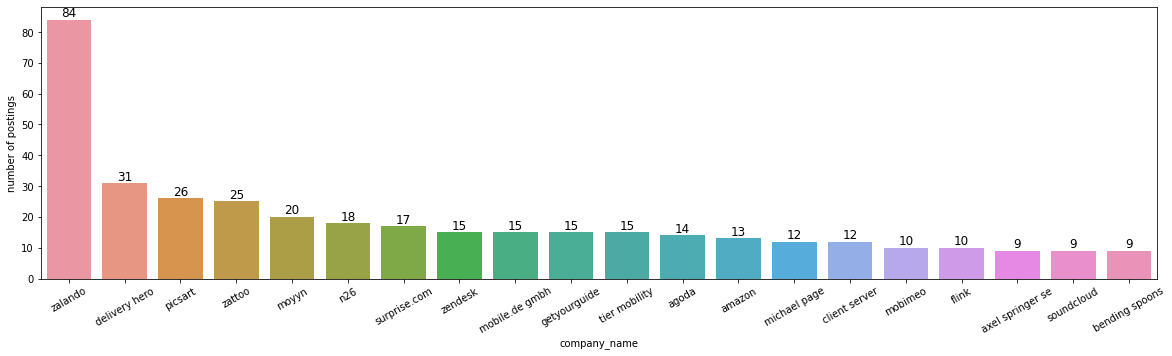

In [47]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_android.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()